# Image

In [22]:
import numpy as np
import pandas as pd
import scipy.io
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler

In [23]:
def get_data_from_mat(train_file,test_file):
    train_mat = scipy.io.loadmat(train_file) 
    test_mat = scipy.io.loadmat(test_file) 
    print(train_mat.keys())
    print(test_mat.keys())
    train_np = np.array(train_mat['train_data']).transpose(2,0,1)
    test_np = np.array(test_mat['test_data']).transpose(2,0,1)
    print(train_np.shape)
    print(test_np.shape)
    return  train_np, test_np


train_data, test_data = get_data_from_mat('datasets/train_data.mat','datasets/test_data.mat')

dict_keys(['__header__', '__version__', '__globals__', 'train_data'])
dict_keys(['__header__', '__version__', '__globals__', 'test_data'])
(112, 90, 90)
(28, 90, 90)


In [24]:
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact

def visualize(image):  
    plt.imshow(image, cmap="gray")
    sns.set(rc = {'figure.figsize':(15,8)})
    plt.show()      


#@interact
def show_ds(ds):
    print("ds shape:",ds.shape)
    print("ds max:",np.max(ds))
    print("ds min:",np.min(ds))
    print("ds average:",np.average(ds))
    @interact
    def visualize_set(scan_index=(0,len(ds)-1)):
        #print(scan_index)
        visualize(ds[scan_index,:,:])

show_ds(train_data)

ds shape: (112, 90, 90)
ds max: 1.0
ds min: 0.0
ds average: 0.024116160549305543


interactive(children=(IntSlider(value=55, description='scan_index', max=111), Output()), _dom_classes=('widget…

In [25]:
show_ds(test_data)

ds shape: (28, 90, 90)
ds max: 1.0
ds min: 0.0
ds average: 0.024994026906171023


interactive(children=(IntSlider(value=13, description='scan_index', max=27), Output()), _dom_classes=('widget-…

In [26]:
data = []
for i,x in enumerate(train_data):
    data.append( train_data[i].flatten())


In [27]:
dataset = pd.read_csv('datasets/train.csv', index_col=0)

In [28]:
labels = dataset.values[:, 0]

In [29]:
def visualize_holdout_balance(labels, titulo):
    sns.set_style('whitegrid')
    sns.set(rc = {'figure.figsize':(15,8)})
    print("casos:",labels.size)
    x, y = np.unique(labels, return_counts=True)
    x_ext=[str(n) for n in x]
    print([str(n) for n in x])
    print(y)
    print(np.sum(y))
    grafico=sns.barplot(x_ext, y)
    grafico.set_title(f'Data balance: {titulo}')
    plt.xticks(rotation=70)
    plt.tight_layout()
    plt.show() 

-----------------------------------casos_treino-----------------------------------
casos: 112
['13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '24', '25', '26', '27', '28', '31', '33', '37', '40', '41', '42', '46', '51', '52', '53', '54', '55', '56', '57', '58', '59', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '76', '77', '79']
[1 1 7 8 2 5 3 2 1 2 5 4 1 3 1 1 1 1 2 1 1 1 2 1 2 1 3 2 2 4 2 1 3 3 2 2 1
 1 4 6 1 4 1 1 2 4 2 1]
112


D:\Anaconda\envs\AP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


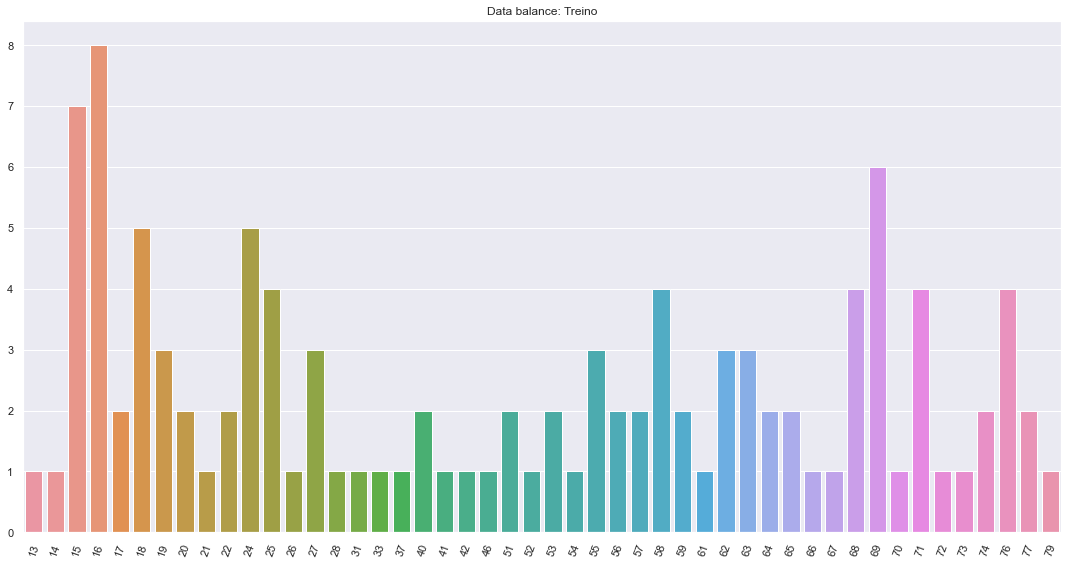

In [30]:
print("-----------------------------------casos_treino-----------------------------------")   
visualize_holdout_balance(labels, 'Treino')

In [31]:
dataframe_train = pd.DataFrame(data)

In [32]:
dataframe_train

,0,1,2,3,4,5,6,7,8,9,...,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099
0,0.0,0.0,0.131525,0.0,0.0,0.0,0.271538,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.585006,0.0,0.280606,0.0,0.0
1,0.0,0.0,0.117704,0.0,0.0,0.0,0.316890,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.599437,0.0,0.207478,0.0,0.0
2,0.0,0.0,0.155806,0.0,0.0,0.0,0.348072,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.630374,0.0,0.246472,0.0,0.0
3,0.0,0.0,0.145214,0.0,0.0,0.0,0.310270,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.562505,0.0,0.287888,0.0,0.0
4,0.0,0.0,0.161360,0.0,0.0,0.0,0.385560,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.564043,0.0,0.234284,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.0,0.0,0.215767,0.0,0.0,0.0,0.390332,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.011150,0.0,0.660292,0.0,0.302675,0.0,0.0
108,0.0,0.0,0.143005,0.0,0.0,0.0,0.306380,0.0,0.0,0.0,...,0.0,0.011171,0.0,0.019141,0.0,0.630415,0.0,0.204125,0.0,0.0
109,0.0,0.0,0.116085,0.0,0.0,0.0,0.290941,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.574355,0.0,0.246784,0.0,0.0
110,0.0,0.0,0.156654,0.0,0.0,0.0,0.357540,0.0,0.0,0.0,...,0.0,0.010225,0.0,0.000000,0.0,0.631057,0.0,0.216259,0.0,0.0


In [33]:
dataframe_train.to_csv("datasets/dataset.csv",index=False)

# Test dataset

In [34]:
df_test = pd.read_csv(("datasets/test.csv")).values

In [35]:
test = []
for i,x in enumerate(test_data):
    test.append(test_data[i].flatten())


In [36]:
dataframe_test = pd.DataFrame(test)

In [37]:
dataframe_test.to_csv("datasets/test_dataset.csv",index=False)

# Numerical data

In [38]:
df_train = pd.read_csv(("datasets/train.csv"))
df_teste = pd.read_csv(("datasets/test.csv"))

In [39]:
df_train=df_train.drop(['id'], axis=1)
df_teste=df_teste.drop(['id'], axis=1)

In [40]:
df_train.head()

,age,sex,education
0,13,1,7
1,14,0,8
2,15,1,9
3,15,1,9
4,15,1,9


In [41]:
df_train.describe()

,age,sex,education
count,112.000000,112.000000,112.000000
mean,44.312500,0.482143,9.035714
std,22.642156,0.501927,4.909870
min,13.000000,0.000000,0.000000
25%,20.000000,0.000000,4.000000
50%,51.500000,0.000000,9.000000
75%,65.250000,1.000000,12.000000
max,79.000000,1.000000,20.000000


In [42]:
df_teste.head()

,sex,education
0,0,13
1,0,11
2,1,9
3,1,13
4,0,12


In [43]:
scaler = MinMaxScaler()

df_train[['education']] = scaler.fit_transform(df_train[['education']])
df_teste[['education']] = scaler.fit_transform(df_teste[['education']])

In [44]:
df_train.head()

,age,sex,education
0,13,1,0.35
1,14,0,0.40
2,15,1,0.45
3,15,1,0.45
4,15,1,0.45


In [45]:
df_teste.head()

,sex,education
0,0,0.764706
1,0,0.647059
2,1,0.529412
3,1,0.764706
4,0,0.705882


In [46]:
df_train.to_csv("datasets/numerical_train.csv",index=False)
df_teste.to_csv("datasets/numerical_teste.csv",index=False)